<a href="https://colab.research.google.com/github/aiformankind/covid-19-hackathon/blob/master/Covid_19_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid-19 Data Exploration

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

Since elderly population is a high risk group, we compute the population distribution of people > 60 year old in California. This will help us in emergency planning.

We found a population projection dataset from California's Department of Finance. http://www.dof.ca.gov/Forecasting/Demographics/Projections/



In [2]:
county_age_df = pd.read_csv('https://raw.githubusercontent.com/aiformankind/covid-19-hackathon/master/County_Age_Projection.csv', skiprows=2, thousands=',')
county_age_df.head(10)

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,...,Column163,Column164,Column165,Column166,Column167,Column168,Column169,Column170,Column171,Column172,Column173,Column174,Column175,Column176,Column177,Column178,Column179,Column180,Column181,Column182,Column183,Column184,Column185,Column186,Column187,Column188,Column189,Column190,Column191,Column192,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,18680.0,18878.0,18309.0,17939.0,17708.0,17488.0,17402.0,17344.0,17341.0,17358.0,17325.0,17234.0,17203.0,17218.0,17340.0,17338.0,17365.0,17538.0,17668.0,17854.0,18057.0,18289.0,18517.0,18617.0,18799.0,19002.0,19112.0,19084.0,18957.0,18848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,19192.0,18680.0,18849.0,18285.0,17899.0,17682.0,17465.0,17386.0,17331.0,17325.0,17343.0,17305.0,17223.0,17177.0,17200.0,17330.0,17328.0,17366.0,17534.0,17652.0,17840.0,18042.0,18288.0,18517.0,18610.0,18791.0,19001.0,19111.0,19089.0,18956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,18823.0,18727.0,18384.0,18594.0,18297.0,17922.0,17643.0,17334.0,17129.0,17083.0,16916.0,16765.0,16799.0,16726.0,16680.0,16642.0,16746.0,16763.0,16763.0,16890.0,17076.0,17302.0,17402.0,17697.0,17951.0,18064.0,18228.0,18436.0,18458.0,18469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,19221.0,19363.0,19202.0,18901.0,19021.0,18845.0,18476.0,18215.0,17888.0,17687.0,17689.0,17485.0,17297.0,17304.0,17295.0,17207.0,17140.0,17251.0,17321.0,17369.0,17404.0,17629.0,17909.0,17873.0,18253.0,18474.0,18584.0,18790.0,18998.0,19001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,19315.0,19308.0,19465.0,19295.0,19015.0,19062.0,18974.0,18621.0,18354.0,18105.0,17927.0,17924.0,17794.0,17573.0,17512.0,17673.0,17622.0,17543.0,17535.0,17585.0,17720.0,17732.0,18015.0,18273.0,18219.0,18638.0,18822.0,18937.0,19148.0,19392.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alameda County,5,19225.0,19634.0,20018.0,21054.0,20145.0,20036.0,20519.0,20065.0,20250.0,19546.0,19492.0,19637.0,19333.0,19051.0,19136.0,19168.0,18944.0,18576.0,18413.0,18444.0,18327.0,18249.0,18031.0,17902.0,18083.0,18014.0,18039.0,18045.0,18034.0,18120.0,18128.0,18527.0,18710.0,18636.0,19121.0,19264.0,19466.0,19638.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Alameda County,6,19002.0,18691.0,19309.0,19654.0,20682.0,19707.0,19617.0,20287.0,19834.0,19706.0,18970.0,18849.0,19027.0,18759.0,18441.0,18563.0,18745.0,18541.0,18149.0,18134.0,18307.0,18129.0,17983.0,17711.0,17456.0,17729.0,17624.0,17579.0,17616.0,17628.0,17575.0,17683.0,18096.0,18264.0,18239.0,18661.0,18799.0,19035.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
import pandas as pd
county_age_df = county_age_df.replace({'Age': '100+'}, '100')
pd.to_numeric(county_age_df['Age'])
pd.to_numeric(county_age_df['2020'])
county_age_df.head(202)

,County,Age,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,...,Column163,Column164,Column165,Column166,Column167,Column168,Column169,Column170,Column171,Column172,Column173,Column174,Column175,Column176,Column177,Column178,Column179,Column180,Column181,Column182,Column183,Column184,Column185,Column186,Column187,Column188,Column189,Column190,Column191,Column192,Column193,Column194,Column195,Column196,Column197,Column198,Column199,Column200,Column201,Column202
0,Alameda County,0,19169.0,19413.0,19093.0,19398.0,19250.0,19290.0,19332.0,19182.0,18680.0,18878.0,18309.0,17939.0,17708.0,17488.0,17402.0,17344.0,17341.0,17358.0,17325.0,17234.0,17203.0,17218.0,17340.0,17338.0,17365.0,17538.0,17668.0,17854.0,18057.0,18289.0,18517.0,18617.0,18799.0,19002.0,19112.0,19084.0,18957.0,18848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda County,1,19387.0,19157.0,19400.0,19092.0,19395.0,19229.0,19287.0,19331.0,19192.0,18680.0,18849.0,18285.0,17899.0,17682.0,17465.0,17386.0,17331.0,17325.0,17343.0,17305.0,17223.0,17177.0,17200.0,17330.0,17328.0,17366.0,17534.0,17652.0,17840.0,18042.0,18288.0,18517.0,18610.0,18791.0,19001.0,19111.0,19089.0,18956.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda County,2,20156.0,19098.0,18955.0,19247.0,19000.0,19098.0,18663.0,18658.0,18823.0,18727.0,18384.0,18594.0,18297.0,17922.0,17643.0,17334.0,17129.0,17083.0,16916.0,16765.0,16799.0,16726.0,16680.0,16642.0,16746.0,16763.0,16763.0,16890.0,17076.0,17302.0,17402.0,17697.0,17951.0,18064.0,18228.0,18436.0,18458.0,18469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda County,3,19614.0,20756.0,19791.0,19702.0,20129.0,19653.0,19770.0,19199.0,19221.0,19363.0,19202.0,18901.0,19021.0,18845.0,18476.0,18215.0,17888.0,17687.0,17689.0,17485.0,17297.0,17304.0,17295.0,17207.0,17140.0,17251.0,17321.0,17369.0,17404.0,17629.0,17909.0,17873.0,18253.0,18474.0,18584.0,18790.0,18998.0,19001.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda County,4,19589.0,19669.0,20873.0,19961.0,19844.0,20323.0,19911.0,20086.0,19315.0,19308.0,19465.0,19295.0,19015.0,19062.0,18974.0,18621.0,18354.0,18105.0,17927.0,17924.0,17794.0,17573.0,17512.0,17673.0,17622.0,17543.0,17535.0,17585.0,17720.0,17732.0,18015.0,18273.0,18219.0,18638.0,18822.0,18937.0,19148.0,19392.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Alpine County,96,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,4.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Alpine County,97,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,4.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [0]:
import pandas as pd
county_age_df['Age']=pd.to_numeric(county_age_df['Age'])

In [0]:
greater_than_sixty = county_age_df[county_age_df['Age'] >= 60]

In [6]:
greater_than_sixty[greater_than_sixty['County'].str.match('Alpine County')]['2020'].sum()

418.0

In [0]:
grouped_by_county = county_age_df[county_age_df['Age'] >= 60][['County','Age','2020']].groupby('County')['2020'].sum()
sorted_grouped_by_county = grouped_by_county.sort_values(ascending=False)

Distribution Plot of Population >= 60 year old by Counties in California

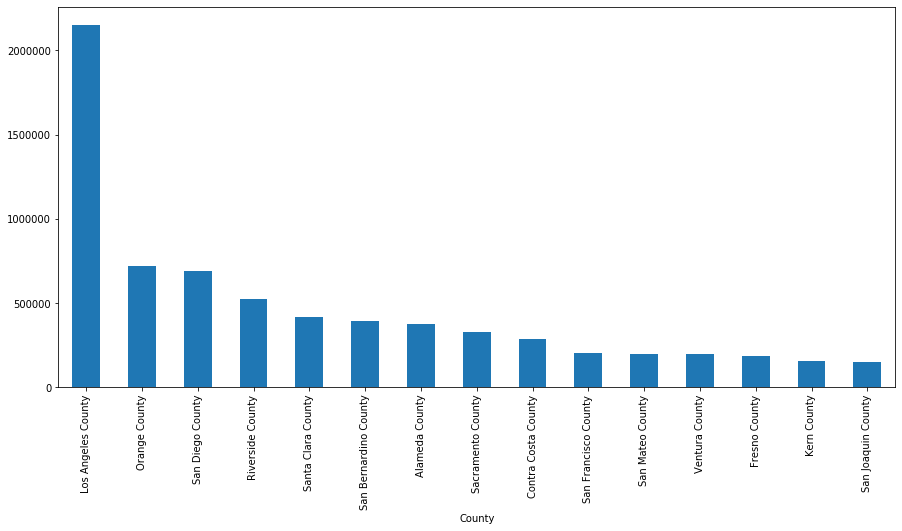

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sorted_grouped_by_county.iloc[0:15].plot.bar(ax=ax)

In [38]:
sorted_grouped_by_county

County
Los Angeles County        2152960.0
Orange County              717395.0
San Diego County           688677.0
Riverside County           525411.0
Santa Clara County         417912.0
San Bernardino County      392687.0
Alameda County             377472.0
Sacramento County          327733.0
Contra Costa County        285941.0
San Francisco County       205190.0
San Mateo County           197665.0
Ventura County             197639.0
Fresno County              182237.0
Kern County                156139.0
San Joaquin County         148223.0
Sonoma County              141367.0
Placer County              107029.0
Stanislaus County          104865.0
Solano County              104407.0
Santa Barbara County        96753.0
Monterey County             87896.0
Marin County                86143.0
Tulare County               82689.0
San Luis Obispo County      76867.0
Santa Cruz County           67628.0
El Dorado County            61438.0
Butte County                57513.0
Shasta County        

We saved and uploaded the above distribution of elderly population age 60 or more across counties in CA in the repo. Checkout https://github.com/aiformankind/covid-19-hackathon/blob/master/elderly_population_by_counties_ca.csv

In [9]:
!pip install -U plotly
!pip install plotly-geo
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3

     |████████████████████████████████| 7.1MB 2.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 23.7MB 37.7MB/s 
     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 316kB/s 
     |████████████████████████████████| 10.4MB 47.6MB/s 
     |████████████████████████████████| 184kB 2.8MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-cp36-none-any.whl size=20467 sha256=0f3b426fafdfd107eedf01b15bcd63262933f8d201a89f51104f008d2b36022c
  Stored in directory: /root/.cache/pip/wheels/ba/1a/67/6a12977f362c33a15edc753daf92c6f01879dbf4db76faf0dd
Successfully built pyshp
     |████████████████████████████████| 1.5MB 2.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Success

In [0]:
fips_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
ca_fips_df = fips_df[fips_df['STNAME'] == 'California']
joined = pd.merge(ca_fips_df[['FIPS','CTYNAME']], grouped_by_county, left_on='CTYNAME', right_on='County')

In [11]:
import numpy as np
import plotly.figure_factory as ff

values = joined['2020']
fips = joined['FIPS']

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(147, 147, 58)',
    'rgb(241, 241, 133)',
    'rgb(62, 85, 73)',
    'rgb(185, 161, 17)',
    'rgb(33, 164, 221)',
    'rgb(255, 186, 84)',
    'rgb(238, 66, 74)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[500, 10000, 20000, 50000, 100000, 200000, 300000, 500000,1000000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population', title='Population > 60 Year Old in California'
)
fig.layout.template = None
fig.show()

![Population >= 60 Year Old](https://drive.google.com/uc?id=1Ktc8eKKmub5R0Haas8YQkMsyPoHG8jIj)

In [12]:
!git clone https://github.com/CSSEGISandData/COVID-19

Cloning into 'COVID-19'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 10607 (delta 14), reused 29 (delta 9), pack-reused 10572
Receiving objects: 100% (10607/10607), 39.89 MiB | 37.69 MiB/s, done.
Resolving deltas: 100% (5078/5078), done.


In [13]:
!head -5 COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990
Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428
Chongqing,Mainland China,30.0572,107.874,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,56

In [14]:
!head -5 COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv

﻿Province/States,Country/Region,WHO region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
Confirmed,Globally,,282,314,581,846,1320,2014,2798,4593,6065,7818,9826,11953,14557,17391,20630,24554,28276,31481,34886,37558,40554,43103,45171,46997,49053,50580,51857,71429,73332,75204,75748,76769,77794,78811,79331,80239,81109,82294,83652,85403,87137,88948,90870
Confirmed,Mainland China,Western Pacific Region,278,309,571,830,1297,1985,2741,4537,5997,7736,9720,11821,14411,17238,20471,24363,28060,31211,34598,37251,40235,42708,44730,46550,48548,50054,51174,70635,72528,74280,74675,75569,76392,77042,77262,77780,78191,78630,78961,79394,79968,80174,80304
Confirmed,Outside of China,,4,5,10,16,23,29,57,56,68,82,106,132,146,153

In [15]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.25.3'

In [16]:
covid_across_countries_df = pd.read_csv('COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv', skiprows=0)
covid_across_countries_df.head(10)

,Province/States,Country/Region,WHO region,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
0,Confirmed,Globally,NaN,282.0,314.0,581.0,846.0,1320.0,2014.0,2798.0,4593.0,6065.0,7818.0,9826.0,11953.0,14557.0,17391.0,20630.0,24554.0,28276.0,31481.0,34886.0,37558.0,40554.0,43103.0,45171.0,46997.0,49053.0,50580.0,51857.0,71429.0,73332.0,75204.0,75748.0,76769.0,77794.0,78811.0,79331.0,80239.0,81109.0,82294.0,83652.0,85403.0,87137.0,88948.0,90870.0
1,Confirmed,Mainland China,Western Pacific Region,278.0,309.0,571.0,830.0,1297.0,1985.0,2741.0,4537.0,5997.0,7736.0,9720.0,11821.0,14411.0,17238.0,20471.0,24363.0,28060.0,31211.0,34598.0,37251.0,40235.0,42708.0,44730.0,46550.0,48548.0,50054.0,51174.0,70635.0,72528.0,74280.0,74675.0,75569.0,76392.0,77042.0,77262.0,77780.0,78191.0,78630.0,78961.0,79394.0,79968.0,80174.0,80304.0
2,Confirmed,Outside of China,NaN,4.0,5.0,10.0,16.0,23.0,29.0,57.0,56.0,68.0,82.0,106.0,132.0,146.0,153.0,159.0,191.0,216.0,270.0,288.0,307.0,319.0,395.0,441.0,447.0,505.0,526.0,683.0,794.0,804.0,924.0,1073.0,1200.0,1402.0,1769.0,2069.0,2459.0,2918.0,3664.0,4691.0,6009.0,7169.0,8774.0,10566.0
3,Suspected,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,5794.0,6973.0,9239.0,12167.0,15238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Severe,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,461.0,976.0,1239.0,1370.0,1527.0,1795.0,2110.0,2296.0,2788.0,3219.0,3859.0,4821.0,6101.0,6188.0,6484.0,7333.0,8204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Deaths,Mainland China,Western Pacific Region,NaN,NaN,NaN,NaN,NaN,NaN,80.0,106.0,132.0,170.0,213.0,259.0,304.0,361.0,425.0,491.0,564.0,637.0,723.0,812.0,909.0,1017.0,1114.0,1260.0,1381.0,1524.0,1666.0,1772.0,1870.0,2006.0,2121.0,2239.0,2348.0,2445.0,2595.0,2666.0,2718.0,2747.0,2791.0,2838.0,2873.0,2915.0,2946.0
6,Hubei,China,Western Pacific Region,258.0,270.0,375.0,375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7153.0,9074.0,11177.0,13522.0,16678.0,19665.0,22112.0,24953.0,27100.0,29631.0,31728.0,33366.0,34874.0,51968.0,54406.0,56249.0,58182.0,59989.0,61682.0,62031.0,62662.0,63454.0,64084.0,64287.0,64786.0,65187.0,65596.0,65914.0,66337.0,66907.0,67103.0,67217.0
7,Guangdong,China,Western Pacific Region,14.0,17.0,26.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,604.0,683.0,797.0,870.0,944.0,1018.0,1075.0,1120.0,1151.0,1177.0,1219.0,1241.0,1261.0,1295.0,1316.0,1322.0,1328.0,1331.0,1332.0,1333.0,1339.0,1342.0,1345.0,1347.0,1347.0,1347.0,1348.0,1349.0,1349.0,1350.0,1350.0
8,Henan,China,Western Pacific Region,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,422.0,493.0,566.0,675.0,764.0,851.0,914.0,981.0,1033.0,1073.0,1105.0,1135.0,1169.0,1184.0,1212.0,1231.0,1246.0,1257.0,1262.0,1265.0,1267.0,1270.0,1271.0,1271.0,1271.0,1271.0,1272.0,1272.0,1272.0,1272.0,1272.0,1272.0
9,Zhejiang,China,Western Pacific Region,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.0,661.0,724.0,829.0,895.0,954.0,1006.0,1048.0,1075.0,1104.0,1117.0,1131.0,1145.0,1155.0,1162.0,1167.0,1171.0,1172.0,1173.0,1175.0,1203.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1205.0,1206.0,1213.0


In [17]:
global_timeseries = covid_across_countries_df.iloc[0].iloc[3:]
global_timeseries.head(5)

1/21/20     282
1/22/20     314
1/23/20     581
1/24/20     846
1/25/20    1320
Name: 0, dtype: object

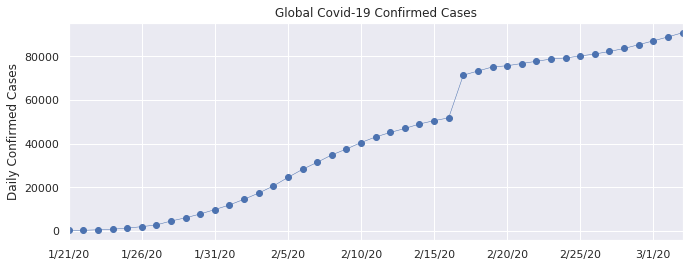

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries.plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases');

In [19]:
global_timeseries = covid_across_countries_df.iloc[:2].T.iloc[3:]
global_timeseries.head(5)

,0,1
1/21/20,282,278
1/22/20,314,309
1/23/20,581,571
1/24/20,846,830
1/25/20,1320,1297


In [20]:
#pd.to_datetime(global_timeseries.iloc[:,0])
global_timeseries['global']=global_timeseries.iloc[:,0]
global_timeseries['USA']=global_timeseries.iloc[:,1]
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.drop(global_timeseries.columns[0],axis=1, inplace=True)
global_timeseries.head(5)


,global,USA
1/21/20,282,278
1/22/20,314,309
1/23/20,581,571
1/24/20,846,830
1/25/20,1320,1297


In [21]:
global_timeseries.index = pd.to_datetime(global_timeseries.index)
global_timeseries.head(5)

,global,USA
2020-01-21,282,278
2020-01-22,314,309
2020-01-23,581,571
2020-01-24,846,830
2020-01-25,1320,1297


Text(0, 0.5, 'Daily Confirmed Cases')

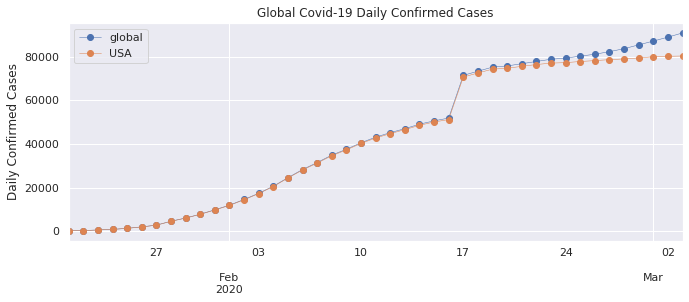

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.plotting.register_matplotlib_converters()

cols = ['global', 'USA']
sns.set(rc={'figure.figsize':(11, 4)})
ax = global_timeseries[cols].plot(linewidth=0.5, marker='o', linestyle='-')
ax.set_title('Global Covid-19 Daily Confirmed Cases')
ax.set_ylabel('Daily Confirmed Cases')
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [23]:
global_timeseries['year'] = global_timeseries.index.year
global_timeseries['month'] = global_timeseries.index.month
global_timeseries['weekday'] = global_timeseries.index.weekday_name
global_timeseries.head(5)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday


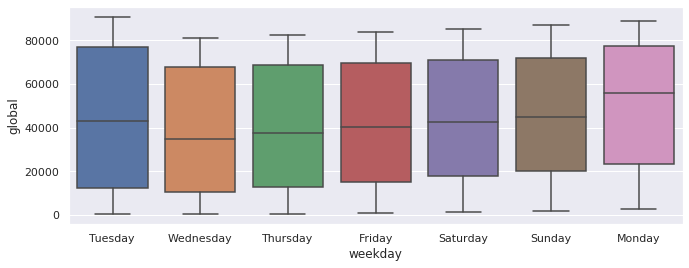

In [24]:
sns.boxplot(data=global_timeseries, x='weekday', y='global')

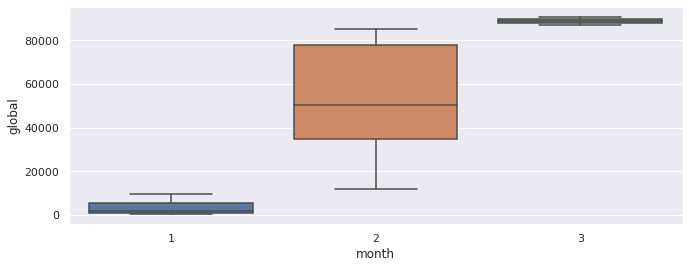

In [25]:
sns.boxplot(data=global_timeseries, x='month', y='global');

In [26]:
global_timeseries.head(10)

,global,USA,year,month,weekday
2020-01-21,282,278,2020,1,Tuesday
2020-01-22,314,309,2020,1,Wednesday
2020-01-23,581,571,2020,1,Thursday
2020-01-24,846,830,2020,1,Friday
2020-01-25,1320,1297,2020,1,Saturday
2020-01-26,2014,1985,2020,1,Sunday
2020-01-27,2798,2741,2020,1,Monday
2020-01-28,4593,4537,2020,1,Tuesday
2020-01-29,6065,5997,2020,1,Wednesday
2020-01-30,7818,7736,2020,1,Thursday


In [27]:
global_timeseries['date'] = global_timeseries.index.to_frame(index=True)
global_timeseries.head(10)

,global,USA,year,month,weekday,date
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25
2020-01-26,2014,1985,2020,1,Sunday,2020-01-26
2020-01-27,2798,2741,2020,1,Monday,2020-01-27
2020-01-28,4593,4537,2020,1,Tuesday,2020-01-28
2020-01-29,6065,5997,2020,1,Wednesday,2020-01-29
2020-01-30,7818,7736,2020,1,Thursday,2020-01-30


In [28]:
global_data = global_timeseries.rename(columns={'date': 'ds', 'global': 'y'})
global_data.head(5)


,y,USA,year,month,weekday,ds
2020-01-21,282,278,2020,1,Tuesday,2020-01-21
2020-01-22,314,309,2020,1,Wednesday,2020-01-22
2020-01-23,581,571,2020,1,Thursday,2020-01-23
2020-01-24,846,830,2020,1,Friday,2020-01-24
2020-01-25,1320,1297,2020,1,Saturday,2020-01-25


In [29]:
import fbprophet
global_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15)
global_prophet.fit(global_data)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
global_forecast = global_prophet.make_future_dataframe(periods=365 * 2, freq='D')
global_forecast = global_prophet.predict(global_forecast)

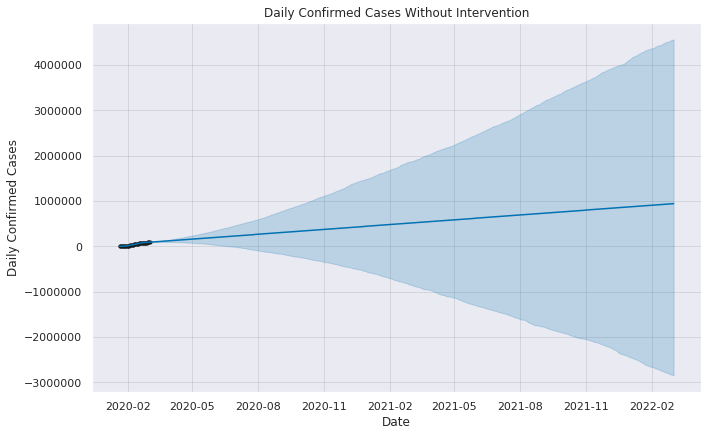

In [31]:
global_prophet.plot(global_forecast, xlabel = 'Date', ylabel = 'Daily Confirmed Cases')
plt.title('Daily Confirmed Cases Without Intervention');

In [32]:
global_prophet.changepoints[:10]

1    2020-01-22
3    2020-01-24
4    2020-01-25
5    2020-01-26
7    2020-01-28
8    2020-01-29
9    2020-01-30
11   2020-02-01
12   2020-02-02
13   2020-02-03
Name: ds, dtype: datetime64[ns]